# DALL-E

In [1]:
import os
from tqdm import tqdm
from IPython.display import display, clear_output
from abcli import file
from abcli.modules.cookie import cookie
from abcli.modules import objects
from openai_cli import NAME, VERSION
from openai_cli.DALLE.canvas import Canvas
from openai_cli.DALLE.brush import TilingBrush

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

Found credentials in shared credentials file: ~/.aws/credentials
using openai_cli-2.46.1.


In [2]:
os.environ["OPENAI_API_KEY"] = cookie["openai_api_key"]

In [3]:
do_validate = True

In [4]:
_, content = file.load_text(objects.path_of("private.txt"))
logger.info(f"loaded {len(content)} line(s) of text.")

loaded 151 line(s) of text.


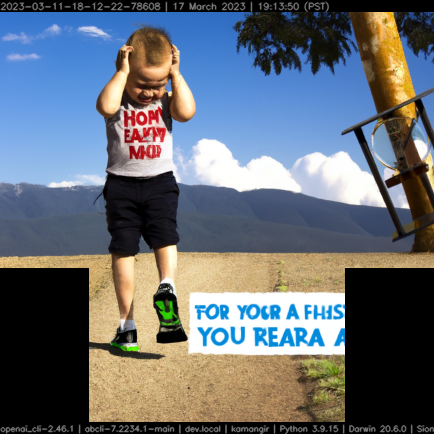

TilingBrush: ring:1 @ 120.00 deg
100%|█████████████████████████████████████████████| 3/3 [00:42<00:00, 14.02s/it]
Canvas -> /Users/kamangir/storage/abcli/2023-03-11-18-12-22-78608/private.png


In [5]:
canvas = Canvas()

canvas.render_text(
    canvas.create_brush(),
    content[: 3] if do_validate else content,
    objects.path_of("private.png"),
);

---

In [6]:
# END